# Path planning

## Point to point path planning

The goal is to implement the following equations to determine the values of the coefficients that form a cubic polynomial that represents the position of a robot joint at time $t$.

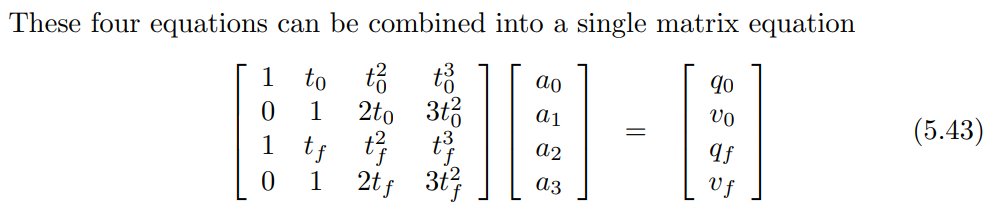

The polynomial is:
$q(t) = a_0 + a_1t + a_2t^2 + a_3t^3$

In [4]:
import numpy as np
q0 = float(input('Enter the initial position q0: '))
qf = float(input('Enter the final position qf: '))
v0 = float(input('Enter the initial velocity v0: '))
vf = float(input('Enter the final velocity vf: '))
t0 = float(input('Enter the initial time t0: '))
tf = float(input('Enter the final time tf: '))

In [6]:
t = np.linspace(t0, tf, int(100 * (tf - t0))) #generate 100 points per second of time.
M = np.array(
[
    [1, t0, t0**2, t0**3],
    [0, 1, 2*t0, 3*t0**2],
    [1, tf, tf**2, tf**3],
    [0, 1, 2*tf, 3*tf**2]
], 
dtype = np.float64)

b = np.array([[q0], [v0], [qf], [vf]], dtype = np.float64)

a = np.linalg.inv(M) @ b

In [7]:
a

array([[ 10.],
       [  0.],
       [-90.],
       [ 60.]])

In [14]:
position = a[0, 0] + a[1, 0]*t + a[2, 0]*t**2 + a[3, 0]*t**3
velocity = a[1, 0] + 2*a[2, 0]*t + 3*a[3, 0]*t**2
acceleration = 2*a[2, 0] + 6*a[3, 0]*t

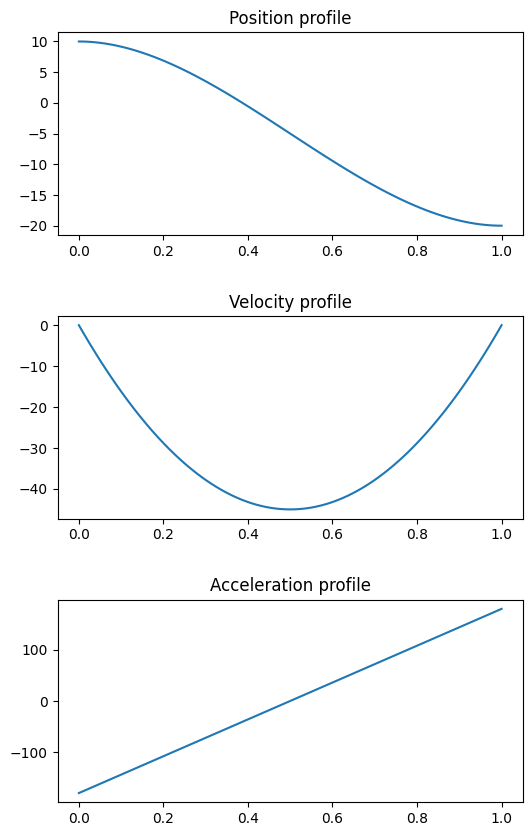

In [20]:
from matplotlib import pyplot as plt

plt.figure(figsize = (6, 10))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(3, 1, 1)
plt.title('Position profile')
plt.plot(t, position)

plt.subplot(3, 1, 2)
plt.title('Velocity profile')
plt.plot(t, velocity)

plt.subplot(3, 1, 3)
plt.title('Acceleration profile')
plt.plot(t, acceleration)
plt.show()

The problem with cubic polynomials is that the acceleration profile has discontinuities in it, which causes the robot to create an impulsive jerk, which may make tracking the joint harder.

For this reason, we can set additional constraints on the initial and final acceleration, which means that we need to construct a 5th degree (6 coefficients) polynomial called a "Quintic polynomial".

The polynomial is: <br>
$q(t) = a_0 + a_1t + a_2t^2 + a_3t^3 + a_4t^4 + a_5t^5$

By differentiating the polynomial twice to obtain a general equation for the acceleration and substituting values for the initial and final time, we obtain the following matrix:

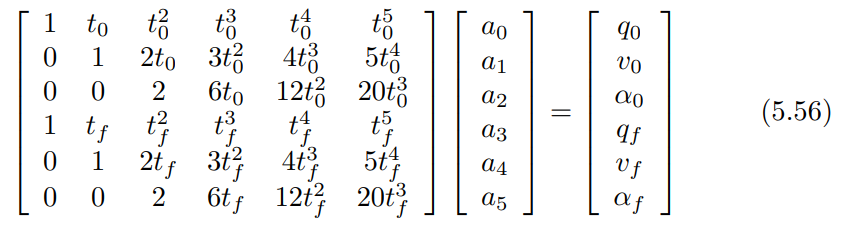

In [27]:
#implementing the quintic polynomial
#setting up the variables for the example
q0 = 0.
qf = 40.
v0 = 0.
vf = 0.
a0 = 0.
af = 0.
t0 = 0.
tf = 2.

#setting up the time axis
t = np.linspace(t0, tf, int(100 * (tf - t0)))
                
#implementing the matrix
M = np.array(
[
    [1, t0, t0**2, t0**3, t0**4, t0**5],
    [0, 1, 2*t0, 3*t0**2, 4*t0**3, 5*t0**4],
    [0, 0, 2, 6*t0, 12*t0**2, 20*t0**3],
    [1, tf, tf**2, tf**3, tf**4, tf**5],
    [0, 1, 2*tf, 3*tf**2, 4*tf**3, 5*tf**4],
    [0, 0, 2, 6*tf, 12*tf**2, 20*tf**3]
]
, dtype = np.float64)

#setting up the constraints vector
b = np.array(
[
    [q0],
    [v0],
    [a0],
    [qf],
    [vf],
    [af]
]
, dtype = np.float64)

#determining the values of the coefficients
a = np.linalg.inv(M) @ b

In [28]:
position = a[0, 0] + a[1, 0]*t + a[2, 0]*t**2 + a[3, 0]*t**3 + a[4, 0]*t**4 + a[5, 0]*t**5
velocity = a[1, 0] + 2*a[2, 0]*t + 3*a[3, 0]*t**2 + 4*a[4, 0]*t**3 + 5*a[5, 0]*t**4
acceleration = 2*a[2, 0] + 6*a[3, 0]*t + 12*a[4, 0]*t**2 + 20*a[5, 0]*t**3

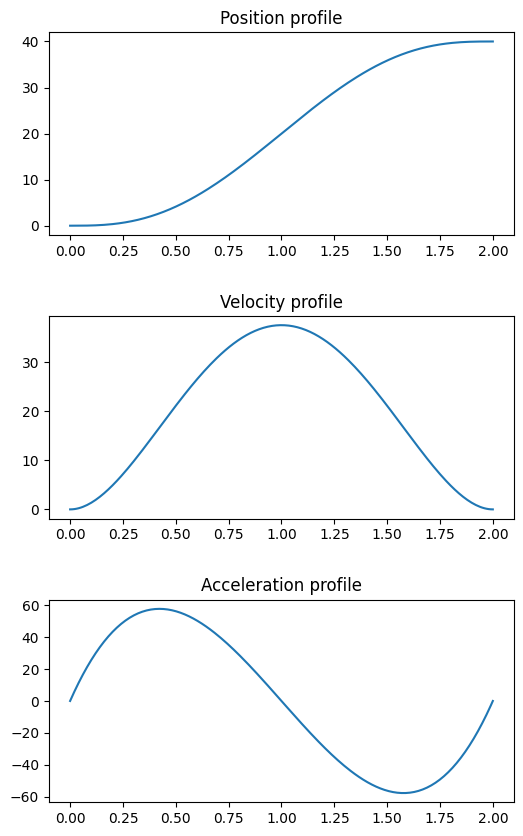

In [29]:
plt.figure(figsize = (6, 10))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(3, 1, 1)
plt.title('Position profile')
plt.plot(t, position)

plt.subplot(3, 1, 2)
plt.title('Velocity profile')
plt.plot(t, velocity)

plt.subplot(3, 1, 3)
plt.title('Acceleration profile')
plt.plot(t, acceleration)
plt.show()

As illustrated in the figure above, the acceleration profile is much better!